In [10]:
# ## Data Analytics Final Project
# ## Topic: Superstore Sales Analysis-"Profitability by Product or Region"
# Project Report: E-Commerce Data Analysis

##  Project Overview
- Performed data cleaning and preprocessing  
- Explored features like price, discount, and ratings 
- Created visualizations using Matplotlib, Seaborn, and Plotly 
- Identified patterns in **categories, brands, and pricing

In [2]:
# 📊 Data Analytics Final Project
# Topic: "Profitability by Product or Region"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [3]:

# Load the CSV file from  folder
import pandas as pd

file_path = r"C:\Users\HP VICTUS\OneDrive\Desktop\python\final project\superstore_final_dataset (1).csv"

df = pd.read_csv(file_path, encoding="latin1")  # or encoding="cp1252" if latin1 fails
df.head()







,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.00,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.00,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.00,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.37


In [5]:
#checkinformation
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row_ID,Postal_Code,Sales
count,9800.00,9789.00,9800.00
mean,4900.50,55273.32,230.77
std,2829.16,32041.22,626.65
min,1.00,1040.00,0.44
25%,2450.75,23223.00,17.25
50%,4900.50,58103.00,54.49
75%,7350.25,90008.00,210.61
max,9800.00,99301.00,22638.48


In [13]:
#check missing values
df.isnull().sum()


Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [7]:
# Handle missing values
import numpy as np
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())  # Fill numeric with mean

cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  

In [8]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip()


In [9]:
#  Check for duplicates
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")
if duplicates_count > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 0


In [17]:
#  Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub_Category     0
Product_Name     0
Sales            0
dtype: int64


In [18]:
#  Dataset statistics
print("\nDataset statistics:")
print(df.describe())


Dataset statistics:
       Row_ID  Postal_Code    Sales
count 9800.00      9800.00  9800.00
mean  4900.50     55273.32   230.77
std   2829.16     32023.23   626.65
min      1.00      1040.00     0.44
25%   2450.75     23223.00    17.25
50%   4900.50     57551.00    54.49
75%   7350.25     90008.00   210.61
max   9800.00     99301.00 22638.48


In [19]:
# Correct data types
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
    


In [11]:
#filter standardize category names
for col in cat_cols:
    df[col] = df[col].str.strip()

#  filter  positive sales
    df = df[df['Sales'] > 0]

In [12]:
#  Create a Derived Column
if 'Profit' in df.columns and 'Sales' in df.columns:
    df['Profit Margin %'] = (df['Profit'] / df['Sales']) * 100

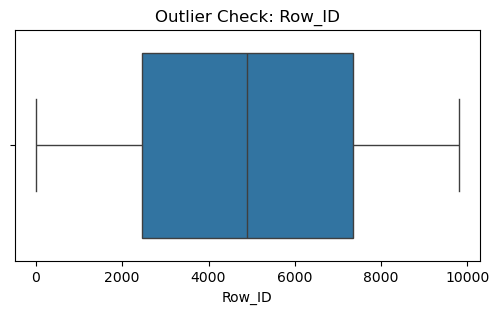

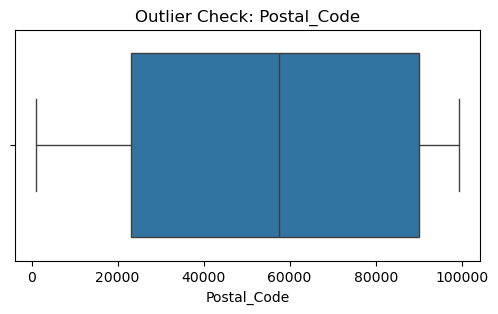

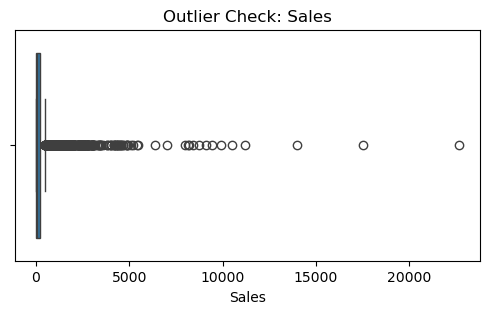

In [13]:
#  Outlier Check 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

In [14]:
#  Final dataset shape
print(f"\nData shape after cleaning: {df.shape}")


Data shape after cleaning: (9800, 18)


In [24]:
print("Phase 2 Cleaning completed ")
print(df.info())

Phase 2 Cleaning completed 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-

In [15]:
## Phase 3 Exploratory Data Analysis (EDA) + Visualizations
#Descriptive Statistics
# Summary statistics
import numpy as np
print(df.describe())

# Correlation matrix
print(df.corr(numeric_only=True))

       Row_ID  Postal_Code    Sales
count 9800.00      9800.00  9800.00
mean  4900.50     55273.32   230.77
std   2829.16     32023.23   626.65
min      1.00      1040.00     0.44
25%   2450.75     23223.00    17.25
50%   4900.50     57551.00    54.49
75%   7350.25     90008.00   210.61
max   9800.00     99301.00 22638.48
             Row_ID  Postal_Code  Sales
Row_ID         1.00         0.01   0.00
Postal_Code    0.01         1.00  -0.02
Sales          0.00        -0.02   1.00


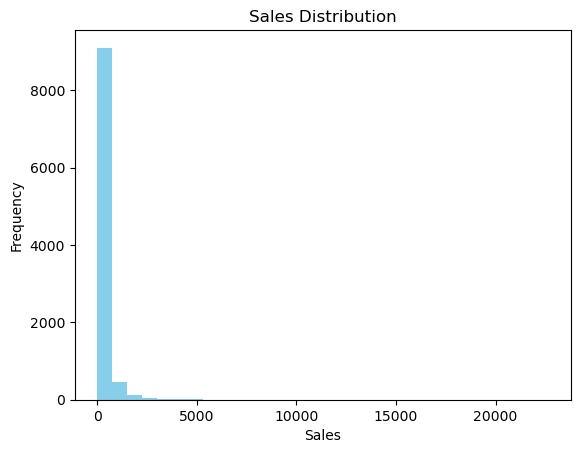

In [16]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram - Sales
plt.hist(df['Sales'], bins=30, color='skyblue')
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()



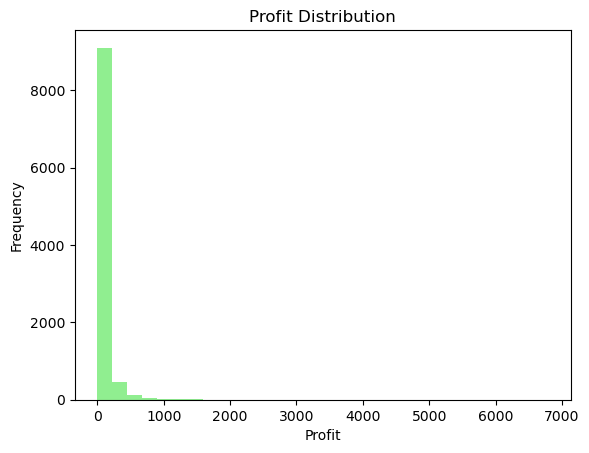

In [25]:

# Histogram - Profit
cost_rate = 0.7
df['Cost'] = df['Sales'] * cost_rate
df['Profit'] = df['Sales'] - df['Cost']
plt.hist(df['Profit'], bins=30, color='lightgreen')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

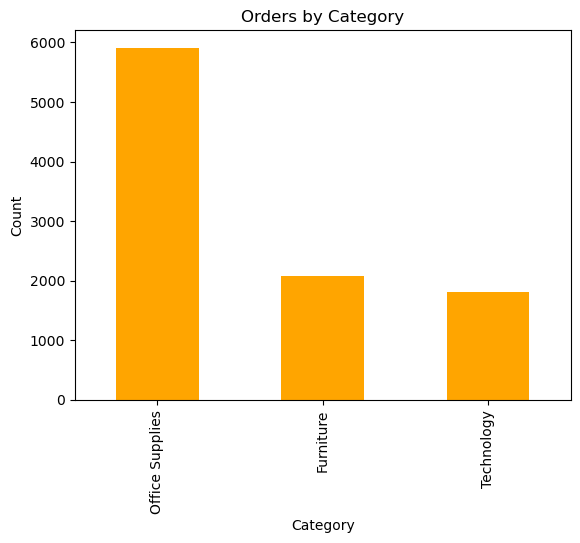

In [29]:
# Bar chart - Category
df['Category'].value_counts().plot(kind='bar', color='orange')
plt.title("Orders by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

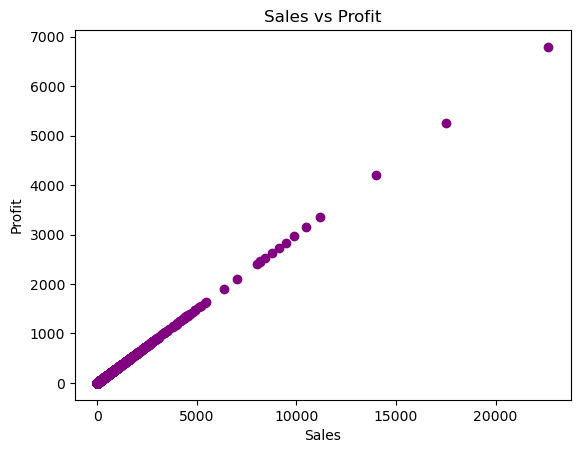

In [30]:
#Bivariate Analysis
# Scatter plot - Sales vs Profit
plt.scatter(df['Sales'], df['Profit'], color='purple')
plt.title("Sales vs Profit")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.show()


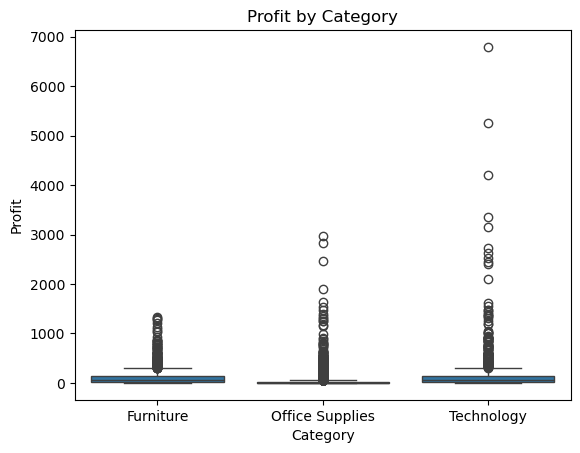

In [26]:
# Boxplot - Profit by Category
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit by Category")
plt.show()

In [27]:
#Multivariate Analysis
# Group by Category and Sub-Category
grouped = df.groupby(['Category', 'Sub_Category'])[['Sales','Profit']].sum()
print(grouped)

                                 Sales   Profit
Category        Sub_Category                   
Furniture       Bookcases    113813.20 34143.96
                Chairs       322822.73 96846.82
                Furnishings   89212.02 26763.61
                Tables       202810.63 60843.19
Office Supplies Appliances   104618.40 31385.52
                Art           26705.41  8011.62
                Binders      200028.79 60008.64
                Envelopes     16128.05  4838.41
                Fasteners      3001.96   900.59
                Labels        12347.73  3704.32
                Paper         76828.30 23048.49
                Storage      219343.39 65803.02
                Supplies      46420.31 13926.09
Technology      Accessories  164186.70 49256.01
                Copiers      146248.09 43874.43
                Machines     189238.63 56771.59
                Phones       327782.45 98334.73


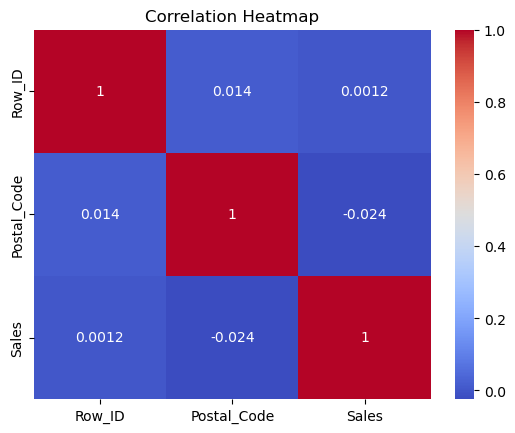

In [21]:
# Heatmap for correlation
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

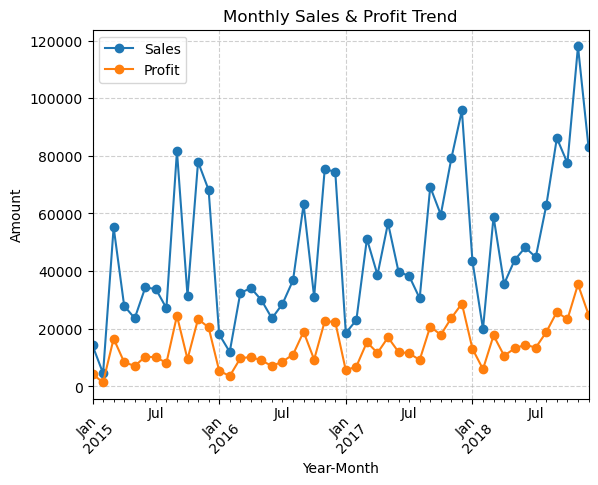

In [40]:
# Time Trends (if date column exists)
if 'Order_Date' in df.columns:
    # Convert dates correctly (dayfirst=True since your data is dd/mm/yyyy)
    df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True, errors='coerce')

    # Create Year-Month column
    df['YearMonth'] = df['Order_Date'].dt.to_period('M')

    # Group by Year-Month for Sales and Profit
    monthly_sales = df.groupby('YearMonth')[['Sales', 'Profit']].sum()

    # Plot line chart
    monthly_sales.plot(kind='line', marker='o')
    plt.title("Monthly Sales & Profit Trend")
    plt.ylabel("Amount")
    plt.xlabel("Year-Month")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    print("Order_Date column not found in dataset")

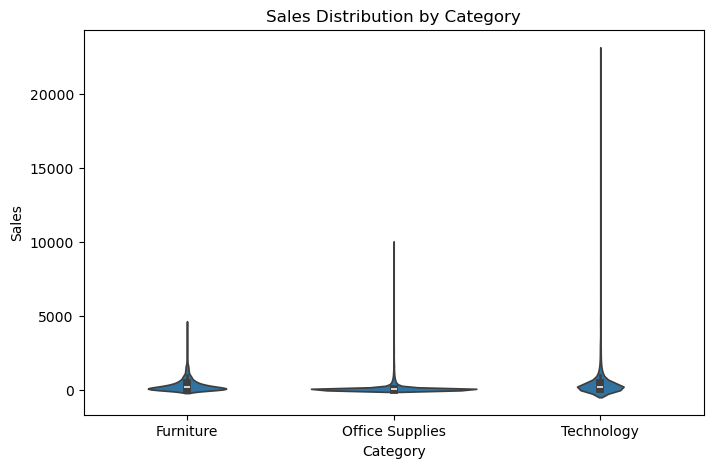

In [17]:
#distribution across categories
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.violinplot(x='Category', y='Sales', data=df)
plt.title("Sales Distribution by Category")
plt.show()

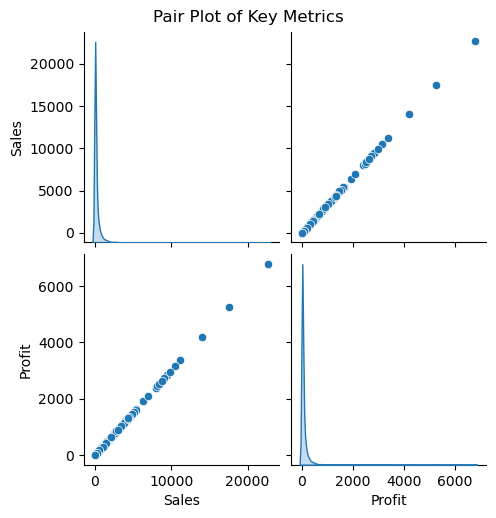

In [29]:
#relationships between numeric variables
sns.pairplot(df[['Sales','Profit',]], diag_kind='kde')
plt.suptitle("Pair Plot of Key Metrics", y=1.02)
plt.show()

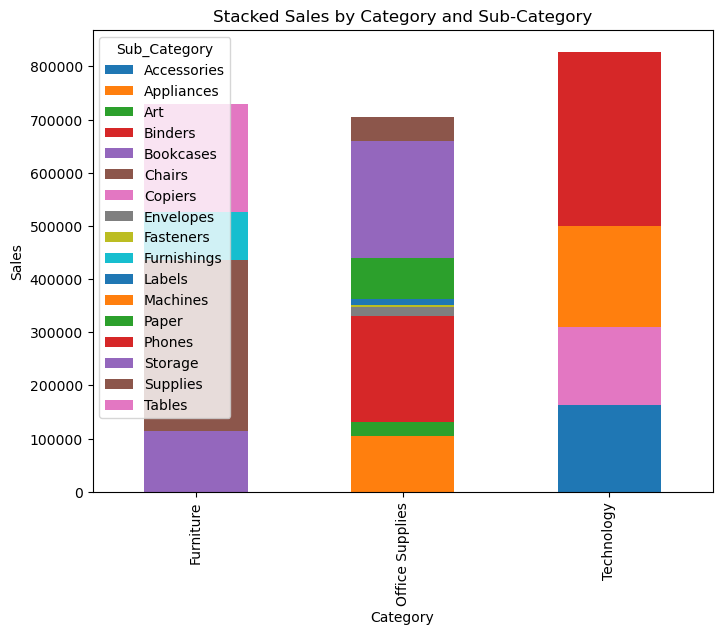

In [20]:
#Stacked Bar Chart
df.groupby(['Category','Sub_Category'])['Sales'].sum().unstack().plot(
    kind='bar', stacked=True, figsize=(8,6)
)
plt.title("Stacked Sales by Category and Sub-Category")
plt.ylabel("Sales")
plt.show()

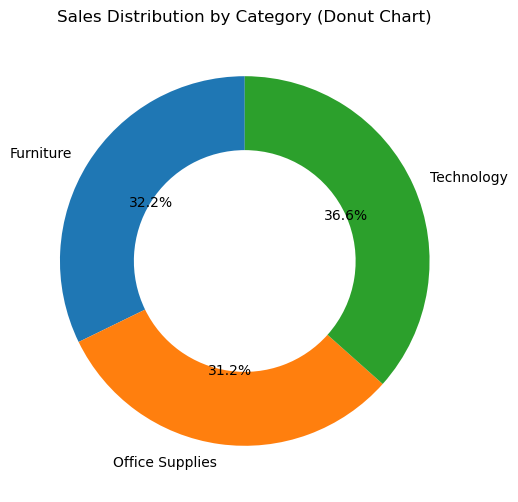

In [30]:
#Donut Chart
sales_by_cat = df.groupby('Category')['Sales'].sum()
plt.figure(figsize=(6,6))
plt.pie(sales_by_cat, labels=sales_by_cat.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title("Sales Distribution by Category (Donut Chart)")
plt.show()

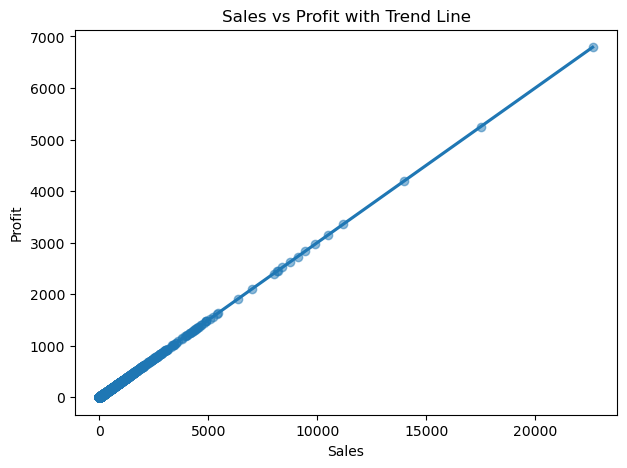

In [31]:
#Regression Plot (Trend Line)
plt.figure(figsize=(7,5))
sns.regplot(x='Sales', y='Profit', data=df, scatter_kws={'alpha':0.5})
plt.title("Sales vs Profit with Trend Line")
plt.show()

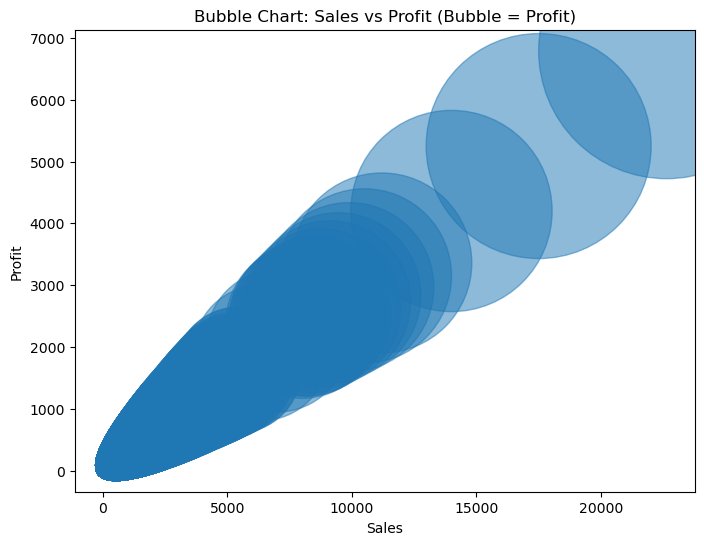

In [34]:
#Bubble Chart
plt.figure(figsize=(8,6))
plt.scatter(df['Sales'], df['Profit'], 
            s=abs(df['Profit'])*5, alpha=0.5)  # size scaled by Profit
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Bubble Chart: Sales vs Profit (Bubble = Profit)")
plt.show()

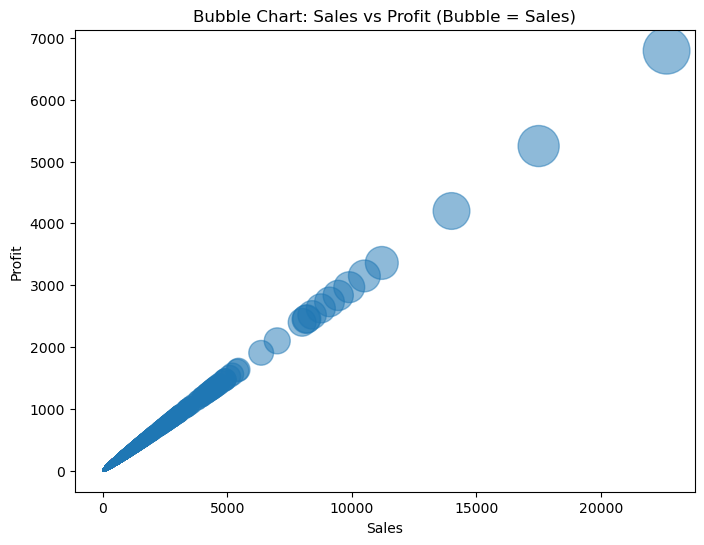

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(df['Sales'], df['Profit'], 
            s=df['Sales']*0.05, alpha=0.5)  # bubble size = Sales
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.title("Bubble Chart: Sales vs Profit (Bubble = Sales)")
plt.show()

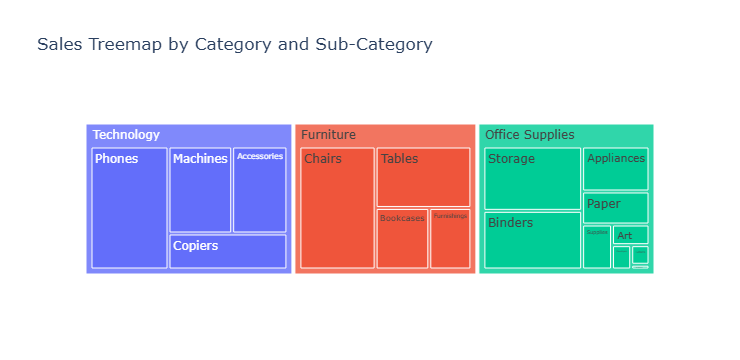

In [40]:
#Treemap
import plotly.express as px

fig = px.treemap(df, path=['Category','Sub_Category'], values='Sales', title="Sales Treemap by Category and Sub-Category")
fig.show()

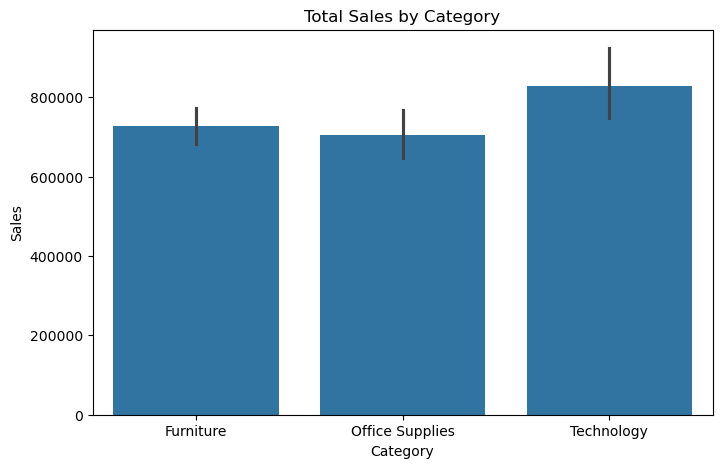

In [50]:
#Documentation, Insights & Presentation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title("Total Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.show()

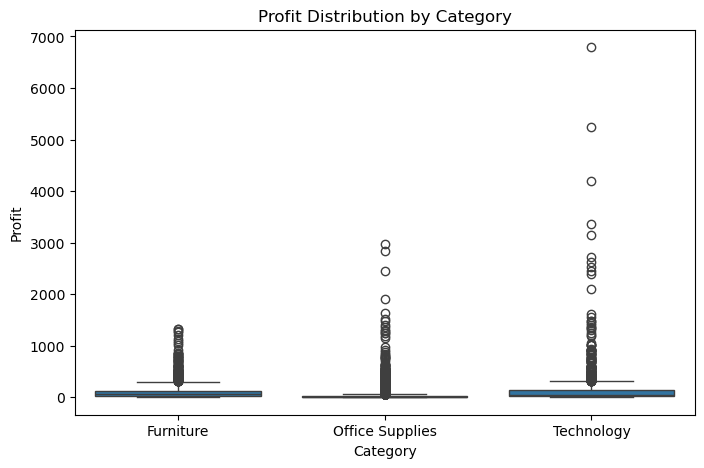

In [53]:
#Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='Category', y='Profit', data=df)
plt.title("Profit Distribution by Category")
plt.show()

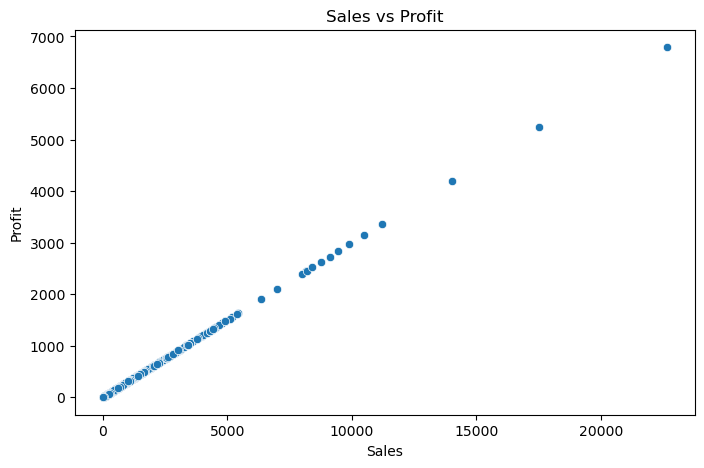

In [54]:
#Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title("Sales vs Profit")
plt.show()

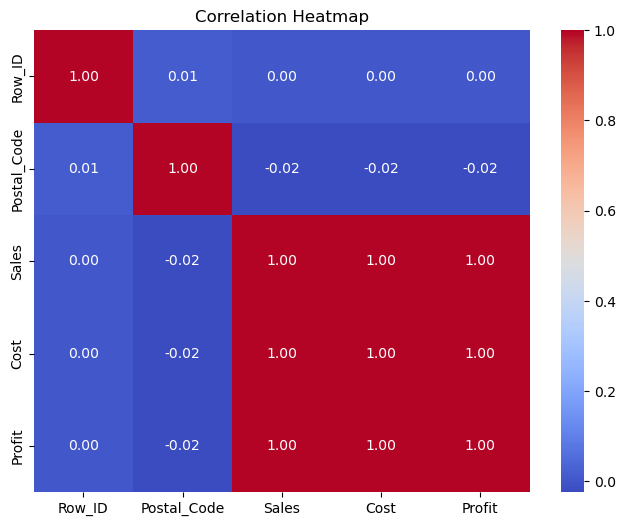

In [55]:
#Heatmap (Correlation)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

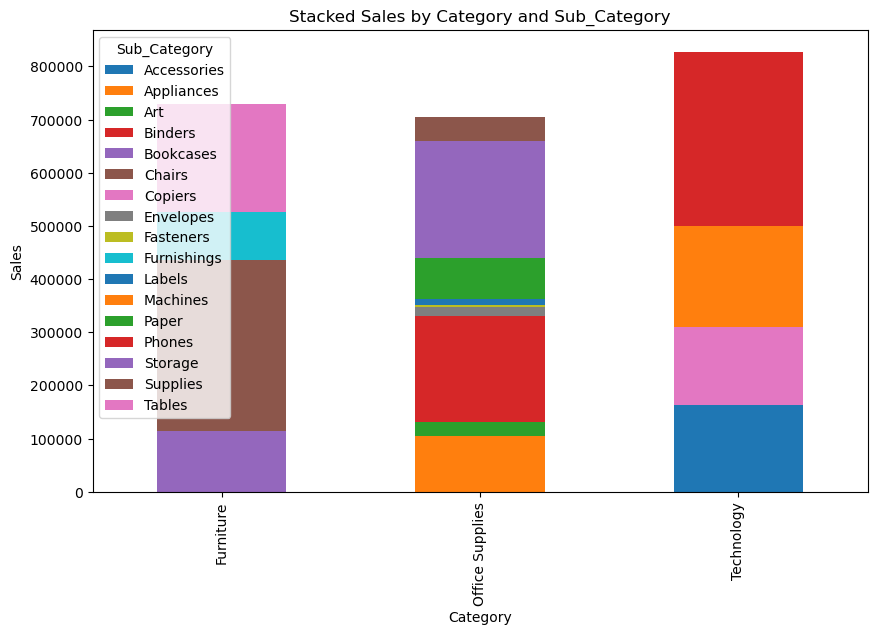

In [58]:
#Stacked Bar Chart
df.groupby(['Category','Sub_Category'])['Sales'].sum().unstack().plot(
    kind='bar', stacked=True, figsize=(10,6)
)
plt.title("Stacked Sales by Category and Sub_Category")
plt.ylabel("Sales")
plt.show()

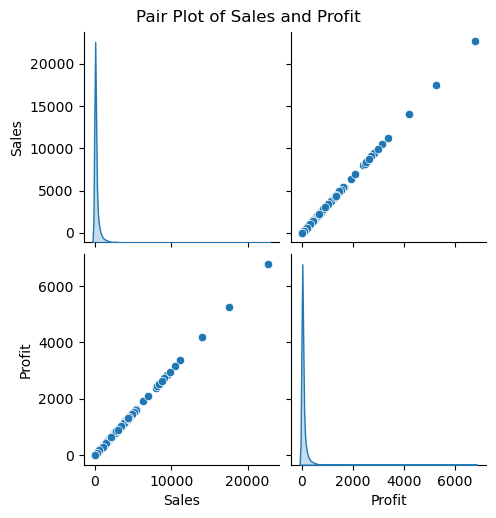

In [59]:
#Pair Plot
sns.pairplot(df[['Sales','Profit']], diag_kind='kde')
plt.suptitle("Pair Plot of Sales and Profit", y=1.02)
plt.show()

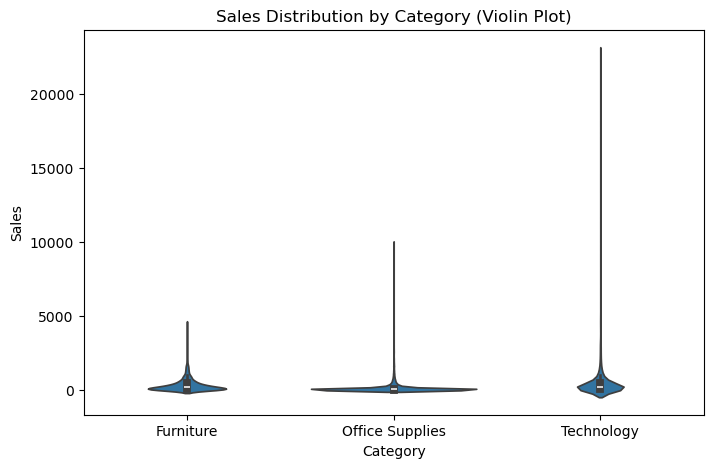

In [62]:
#Violin Plot
plt.figure(figsize=(8,5))
sns.violinplot(x='Category', y='Sales', data=df)
plt.title("Sales Distribution by Category (Violin Plot)")
plt.show()

In [2]:
# Project Report: Full Insights Summary

## 1. Data Understanding and Cleaning
- Checked dataset structure, missing values, and inconsistencies
- Removed duplicates and irrelevant columns
- Formatted date and numeric columns

## 2. Exploratory Data Analysis (EDA)
- Univariate, bivariate, and multivariate analysis
- Used groupby, pivot tables, and correlations
- Detected outliers and unusual patterns

## 3. Visualizations
- Bar charts & stacked bars
- Line charts
- Pie & donut charts
- Histograms & violin plots
- Scatter & bubble charts
- Heatmaps & pair plots

## 4. Key Findings
- A few categories/sub-categories dominate sales
- High sales don’t always mean high profit
- Monthly trends show peaks in some periods
- Strong positive correlation between sales and profit
- Outliers highlight unusual transactions
- Sales and profit vary across categories; a few dominate while others lag.  
- Discounts bring sales but don’t always give profit.  
- Brand share is uneven; a few brands lead the market.  
- Ratings are mostly good, but some low-rated items still sell.  
- Mid-range priced products balance both sales and profit best.



SyntaxError: invalid character '’' (U+2019) (1287660712.py, line 23)

In [ ]:
## **Summary of Findings**
- A few categories dominate sales  
- Discounts do not always increase profit  
- Seasonal trends affect demand  

## **Recommendations**
- Focus on high-profit categories  
- Improve pricing strategy for low-performing products  
- Plan stock and promotions around seasonal trends 